In [1]:
# Inicialización del setup
%matplotlib inline
import matplotlib.pyplot as plt

from sympy import *
init_printing()

# 0. Introducción

En el 'espacio', las estructuras que mejor conocemos y que más fácilmente podemos manejar son las estructuras lineales. Estas vienen dadas por soluciones a sistemas de ecuaciones lineales.

Por ejemplo, en el plano $\mathbb{R}^2$, podemos tener la recta

$$
    x + 2y=0.
$$

In [2]:
x, y = symbols("x, y")


x + 2*y

/usr/local/lib/python3.6/dist-packages/sympy/plotting/plot.py:890: MatplotlibDeprecationWarning: 
The set_smart_bounds function was deprecated in Matplotlib 3.2 and will be removed two minor releases later.
  self.ax.spines['left'].set_smart_bounds(True)
/usr/local/lib/python3.6/dist-packages/sympy/plotting/plot.py:891: MatplotlibDeprecationWarning: 
The set_smart_bounds function was deprecated in Matplotlib 3.2 and will be removed two minor releases later.
  self.ax.spines['bottom'].set_smart_bounds(False)
/usr/local/lib/python3.6/dist-packages/sympy/plotting/plot.py:930: MatplotlibDeprecationWarning: 
The set_smart_bounds function was deprecated in Matplotlib 3.2 and will be removed two minor releases later.
  self.ax.spines['left'].set_smart_bounds(False)
/usr/local/lib/python3.6/dist-packages/sympy/plotting/plot.py:931: MatplotlibDeprecationWarning: 
The set_smart_bounds function was deprecated in Matplotlib 3.2 and will be removed two minor releases later.
  self.ax.spines['bottom

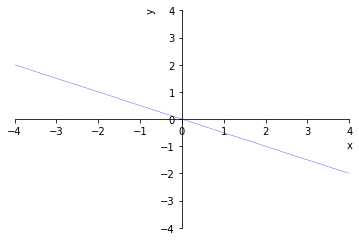

In [3]:
#f1 = lambdify([x], (x + pi)**2, 'numpy')

#implicit_plot(x + 2*y, (x, -2, 2), (y, -2, 2))

plot_implicit(x+2*y, (x, -4, 4), (y, -4, 4))

Esta es una 'recta vectorial', porque pasa por el $(0,0)$. Del mismo modo, podemos tener rectas afines como la siguiente

$$
    x + 2y = -5
$$

/usr/local/lib/python3.6/dist-packages/sympy/plotting/plot.py:890: MatplotlibDeprecationWarning: 
The set_smart_bounds function was deprecated in Matplotlib 3.2 and will be removed two minor releases later.
  self.ax.spines['left'].set_smart_bounds(True)
/usr/local/lib/python3.6/dist-packages/sympy/plotting/plot.py:891: MatplotlibDeprecationWarning: 
The set_smart_bounds function was deprecated in Matplotlib 3.2 and will be removed two minor releases later.
  self.ax.spines['bottom'].set_smart_bounds(False)
/usr/local/lib/python3.6/dist-packages/sympy/plotting/plot.py:930: MatplotlibDeprecationWarning: 
The set_smart_bounds function was deprecated in Matplotlib 3.2 and will be removed two minor releases later.
  self.ax.spines['left'].set_smart_bounds(False)
/usr/local/lib/python3.6/dist-packages/sympy/plotting/plot.py:931: MatplotlibDeprecationWarning: 
The set_smart_bounds function was deprecated in Matplotlib 3.2 and will be removed two minor releases later.
  self.ax.spines['bottom

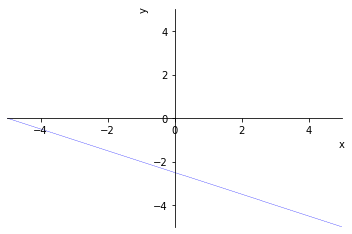

In [4]:
plot_implicit(x + 2*y + 5, (x, -5, 5), (y, -5, 5))

En general, las rectas del plano son de la forma

$$
    a x + by = c
$$

para ciertos $a,b \in \mathbb{R}$.

Ahora bien, si juntamos dos ecuaciones, el resultado que tenemos es el de cortar dos planos, por lo que obtenemos puntos.

$$
    \left\{\begin{matrix} x+2y=-5 \\ x + y = -2 \end{matrix} \right. .
$$

/usr/local/lib/python3.6/dist-packages/sympy/plotting/plot.py:890: MatplotlibDeprecationWarning: 
The set_smart_bounds function was deprecated in Matplotlib 3.2 and will be removed two minor releases later.
  self.ax.spines['left'].set_smart_bounds(True)
/usr/local/lib/python3.6/dist-packages/sympy/plotting/plot.py:891: MatplotlibDeprecationWarning: 
The set_smart_bounds function was deprecated in Matplotlib 3.2 and will be removed two minor releases later.
  self.ax.spines['bottom'].set_smart_bounds(False)
/usr/local/lib/python3.6/dist-packages/sympy/plotting/plot.py:930: MatplotlibDeprecationWarning: 
The set_smart_bounds function was deprecated in Matplotlib 3.2 and will be removed two minor releases later.
  self.ax.spines['left'].set_smart_bounds(False)
/usr/local/lib/python3.6/dist-packages/sympy/plotting/plot.py:931: MatplotlibDeprecationWarning: 
The set_smart_bounds function was deprecated in Matplotlib 3.2 and will be removed two minor releases later.
  self.ax.spines['bottom

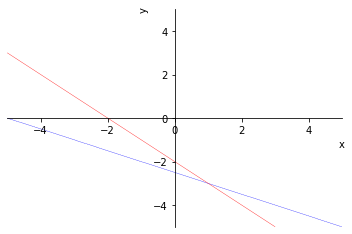

In [5]:
p1 = plot_implicit(x + 2*y + 5, (x, -5, 5), (y, -5, 5), show=False)
p2 = plot_implicit(x + y + 2, (x, -5, 5), (y, -5, 5), line_color = 'red', show=False)
p1.append(p2[0])
p1.show()

El punto de corte no es sino la solución del sistema de ecuaciones.

In [6]:
solve([x + 2*y + 5, x + y + 2], x, y)

En dimensión mayor, la situación es análoga, pero ahora tenemos 'más espacio'. Por ejemplo, en el espacio tridimensional $\mathbb{R}^3$, el análogo de la recta es el plano.

$$
    x - 2y + z = 0 \Leftrightarrow z = -x + 2y
$$

En este caso, una recta se obtiene como la intersección de dos planos

$$
    \left\{\begin{matrix} x-2y+z=0 \\ x + y + 2z = 0 \end{matrix} \right. \Rightarrow \left\{\begin{matrix} x=5y \\ z = -3y \end{matrix} \right..
$$

In [7]:
z = Symbol("z")

solve([x - 2*y + z, x + y + 2*z], z, x, y)

De este modo, los puntos se obtendrían como la intersección de tres planos, es decir, como la solución a un sistema de tres ecuaciones.

El objetivo de álgebra lineal es entender estos objetos geométricos en más dimensiones e, incluso, en espacios más generales conocidos como **espacios vectoriales**.

## 0.1. Clasificador de Joke-Toy

Un clasificador muy sencillo que puede construirse únicamente sabiendo qué es una recta es el clasificador de Joke-Toy. Suponemos que tenemos dos nubes de puntos de dos clases distintas.

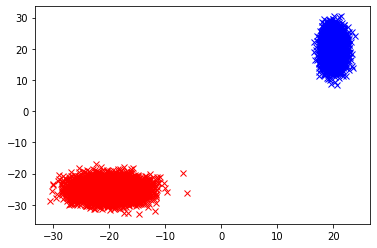

In [8]:
import numpy as np
import matplotlib.pyplot as plt

mean1 = [20, 20]
cov1 = [[1, 0], [0, 10]]
sample1 = np.random.multivariate_normal(mean1, cov1, int(5000))
plt.plot(sample1[:,0], sample1[:,1], 'x', color='blue')

mean2 = [-20, -25]
cov2 = [[10, 0], [0, 5]]
sample2 = np.random.multivariate_normal(mean2, cov2, int(5000))
plt.plot(sample2[:,0], sample2[:,1], 'x', color='red')

plt.show()

La mejor forma de 'resumir' la información de ambas nubes es quedarse con sus centros de gravedad (sus medias).

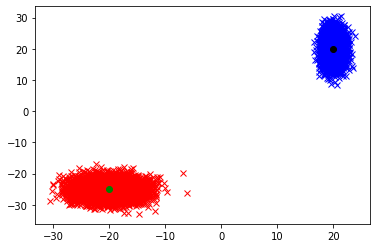

In [9]:
center1 = sample1.mean(axis=0)
center2 = sample2.mean(axis=0)

plt.plot(sample1[:,0], sample1[:,1], 'x', color='blue')
plt.plot(sample2[:,0], sample2[:,1], 'x', color='red')
plt.plot(center1[0], center1[1], 'o', color='black')
plt.plot(center2[0], center2[1], 'o', color='green')
plt.show()

Una vez tenemos los centros, $c_1$ y $c_2$, la recta que los une es la recta que pasa por $c_1$ y $c_2$. De este modo, la familia de rectas que es perpendicular a la recta que une $c_1$ y $c_2$, o lo que es igual, al vector $c_1-c_2$. Así, tienen la forma:

$$
    (c_1 - c_2)_x x + (c_1 - c_2)_y y + a = 0
$$

para algún $a \in \mathbb{R}$.

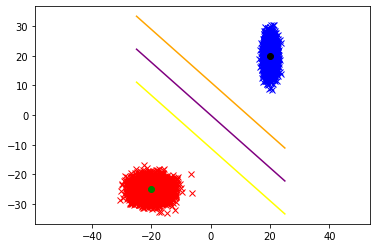

In [10]:
direccion = center1 - center2

step = np.linspace(-25, 25)

plt.plot(step, (-direccion[0]*step-500)/direccion[1], color = 'yellow')
plt.plot(step, (-direccion[0]*step)/direccion[1], color = 'purple')
plt.plot(step, (-direccion[0]*step+500)/direccion[1], color = 'orange')

plt.plot(sample1[:,0], sample1[:,1], 'x', color='blue')
plt.plot(sample2[:,0], sample2[:,1], 'x', color='red')
plt.plot(center1[0], center1[1], 'o', color='black')
plt.plot(center2[0], center2[1], 'o', color='green')

plt.axis('equal')
plt.plot()

Para encontrar la mejor de todas las rectas de esta familia, podemos por ejemplo imponer que pase por el punto medio de $c_1$ y $c_2$, $m = (c_1 + c_2)/2$. De este modo, $a$ tiene que satisfacer

$$
    (c_1 - c_2)_x m_x + (c_1 - c_2)_y m_y + a = 0
$$

lo que, resolviendo, permite obtener $a$ y la recta separadora completa.

In [11]:
a = Symbol("a")

mid_point = (center1 + center2)/2

a0 = solve([direccion[0]*mid_point[0] + direccion[1]*mid_point[1] + a], a, dict=True)
a0

In [12]:
mid_point = (center1 + center2)/2

separator = direccion[0]*x + direccion[1]*y + a0[0][a].n()

separator

In [13]:
solve(separator, y, dict=True)[0][y].subs(x, 10)

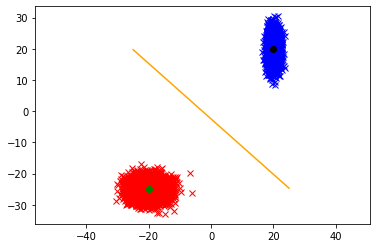

In [14]:
plt.plot(sample1[:,0], sample1[:,1], 'x', color='blue')
plt.plot(sample2[:,0], sample2[:,1], 'x', color='red')
plt.plot(center1[0], center1[1], 'o', color='black')
plt.plot(center2[0], center2[1], 'o', color='green')

# plt.plot(step, np.array([solve(separator, y, solution_dict=True)[0][y].subs(x == x0) for x0 in step]), color = 'orange')
plt.plot(step, np.array([solve(separator, y, dict=True)[0][y].subs(x, x0) for x0 in step]), color = 'orange')

plt.axis('equal')
plt.plot()

## 0.2 Clasificador de Joke-Toy en dimensión general

In [15]:
def joke_toy(sample1, sample2):
    center1 = sample1.mean(axis=0)
    center2 = sample2.mean(axis=0)

    direction = center1 - center2
    mid_point = (center1 + center2)/2
    intercept = -sum([direction[i]*mid_point[i] for i in range(len(direction))])
    
    string_vars = ''
    for i in range(1,len(direction)+1):
        string_vars += ' x_%s'%(i)
    
    varibs = var(string_vars)
    
    return sum([direction[i]*varibs[i] for i in range(len(direction))]) + intercept

In [16]:
joke_toy(sample1, sample2)

In [17]:
import numpy as np
import matplotlib.pyplot as plt

mean1 = [20, 20, 15]
cov1 = [[1, 0,0], [0, 10, 0],[0, 0, 5]]
sample1 = np.random.multivariate_normal(mean1, cov1, int(500))

mean2 = [-20, -25, -12]
cov2 = [[10, 0, 0], [0, 5, 0],[0, 0, 12]]
sample2 = np.random.multivariate_normal(mean2, cov2, int(500))

In [18]:
separator = joke_toy(sample1, sample2)
separator

![](https://i.imgur.com/TYhrVtb.png)

# 1. Conceptos básicos
## 1.1. Espacios vectoriales

**Definición.** Un espacio vectorial es un conjunto $V$ con dos operaciones, denotadas $+$ y $\cdot$.
* La operación $+$, llamada suma, toma dos vectores $v,w \in V$ y devuelve un vector $v+w$.
* La operación $\cdot$, llamada producto por escalares, toma un número $\lambda \in \mathbb{R}$ y un vector $v$ y devuelve un vector $\lambda \cdot v \in V$.

**Ejemplos**
* $\mathbb{R}^n$ con la suma y producto componente a componente.
* Soluciones de sistemas de ecuaciones.

**Observación.** También se pueden considerar espacios vectoriales sobre $\mathbb{C}$ o, en general, sobre cualquier cuerpo.

## 1.2. Subespacios vectoriales

Consideremos el sistema
$$
\left\{\begin{matrix}x+y=0 \\ 2x+2y=0\end{matrix}\right.
$$

Este sistema tiene por soluciones el conjunto $S$ de los puntos $(x,y) \in \mathbb{R}^2$ de la forma $(x,y)=(a, -a)$. Este conjunto es un espacio vectorial: Si yo cojo dos vectores $v = (a, -a)$ y $w = (b, -b)$ entonces $v+w=(a+b,-(a+b)) \in S$ y $\lambda v=(\lambda a, -\lambda a) \in S$.

De hecho, se tiene que $S$ es un subconjunto del espacio vectorial $\mathbb{R}^2$ y hereda sus operaciones. Este fenómeno se llama *subespacio vectorial*.

**Ejercicios.**
* El espacio de polinomios, $\mathbb{R}[x]$, con la suma de polinomios y el producto por números es un espacio vectorial.
* El espacio de polinomios de grado menor o igual que $n$, $\mathbb{R}^{\leq n}[x]$, es un espacio vectorial.

## 1.3. Bases

**Definición** Sea $V$ un espacio vectorial. Dado un subconjunto finito $\left\{b_1, \ldots, b_d\right\} \subseteq V$, se dice que es
* *Sistema de generadores* si, para todo $v \in V$, existen $\lambda_1, \ldots, \lambda_d \in \mathbb{R}$ tales que
$$
    v = \lambda_1 b_1 + \ldots + \lambda_d b_d.
$$
* *Linealmente independiente* si, para cualesquiera $\lambda_1, \ldots, \lambda_d \in \mathbb{R}$ tales que
$$
    \lambda_1 b_1 + \ldots + \lambda_d b_d = 0 \Rightarrow \lambda_1 = \lambda_2 = \ldots = \lambda_d = 0.
$$
* *Base* si es un sistema de generadores linealmente independiente. En ese caso se dice que $d$ es la dimensión de $V$ y se escribe $d = \mathrm{dim}\,V$.

**Ejemplos**
* $e_1 = (1,0,\ldots), \ldots, e_n = (0,\ldots, 1)$ es base de $\mathbb{R}^n$. Luego $\mathrm{dim}\,\mathbb{R}^n =n$.
* Dar una base y calcular la dimensión del espacio de polinomios de grado menor que $n$. ¿Y de todo el espacio de polinomios?
* Dar una base de $S$ del ejemplo anterior.

In [19]:
solve([x+y, 2*x+2*y], [x, y])

* Dar una base del espacio de soluciones del sistema

$$
\left\{\begin{matrix}
 x   + 2y   + 3z & = 0\\
4x  +5y  +6z& = 0\\
 7x   +8y   +9z& = 0\\
\end{matrix}\right.
$$

In [20]:
solve([x + 2*y + 3*z, 4*x + 5*y + 6*z, 7*x + 8*y +9*z], [x, y, z])

* Dar una base del espacio de soluciones del sistema

$$
\left\{\begin{matrix}
 x_1   +2x_2   +2x_3  -5x_4   +6x_5 & = 0\\
-x_1  -2x_2  -x_3   +x_4  -x_5& = 0\\
 4x_1   +8x_2   +5x_3  -8x_4   +9x_5& = 0\\
 3x_1   +6x_2   +x_3   +5x_4  -7x_5& = 0
\end{matrix}\right.
$$

In [21]:
x1, x2, x3, x4, x5 = symbols('x1, x2, x3, x4, x5')

A = Matrix([[1 ,  2 ,  2 , -5 ,  6], [-1, -2, -1,  1, -1], [4,  8,  5, -8,  9],[3,  6, 1,  5, -7]])
A

⎡1   2   2   -5  6 ⎤
⎢                  ⎥
⎢-1  -2  -1  1   -1⎥
⎢                  ⎥
⎢4   8   5   -8  9 ⎥
⎢                  ⎥
⎣3   6   1   5   -7⎦

In [22]:
Ax = A*Matrix([[x1, x2, x3, x4, x5]]).T
Ax
print('Solucion:')
solve(Ax, x1, x2, x3, x4, x5)

Solucion:


* **Modelo de Leontief.** Apple, Intel y Nvidia son tres empresas interrelacionadas, en el sentido de que cada una de ellas genera un bien específico (digamos Mac's, CPUs y tarjetas gráficas, respectivamente) que las demás requieren para continuar su proporción. Supongamos que las dependencias son como sigue: Cada unidad de Mac requiere 0.3 unidades de otros Mac's, 0.4 unidades CPUs y 0.3 unidades de tarjetas gráficas. Cada CPU producida por Intel necesita 0.3 unidades de Mac's, 0.2 CPUs y 0.5 tarjetas gráficas. Finalmente, cada tarjeta gráfica necesita 0.4 Mac's, 0.4 CPUs y 0.2 tarjetas gráficas para ser producidas. Determinar los niveles de proporción necesarios para que la economía se encuentre en equilibrio.

In [23]:
A = Matrix([[0.3-1,  0.4,  0.3], [0.3, 0.2-1, 0.5], [0.4,  0.4,  0.2-1]])
solve(A*Matrix([x1, x2, x3]), x1, x2, x3)

## 1.4. Aplicaciones lineales

**Definición** Sean $V, W$ dos espacio vectoriales. Una función $f: V \to W$ se dice una *aplicación lineal* si
* $f(v+w)=f(v) + f(w)$.
* $f(\lambda v) = \lambda f(v)$.

**Ejemplos**
* $f: \mathbb{R} \to \mathbb{R}$ dada por $f(x)=5x$.
* $f: \mathbb{R}^2 \to \mathbb{R}^3$ dada por $f(x,y) = (3x+5y, x-y, x-2y)$.
* $f: \mathbb{R} \to \mathbb{R}$ dada por $f(x)=x^2$ **no es** aplicación lineal.
* $f: \mathbb{R}[x] \to \mathbb{R}$, $f(P)=P(5)$.

**Definición** Si $f: V \to W$ es una aplicación lineal, definimos:
* El *kernel* (o *núcleo*) es
$$
    \mathrm{Ker}\,f = \left\{v \in V\,|\, f(v)=0\right\}.
$$
* La *imagen* es
$$
    \mathrm{Im}\,f = f(V) \subseteq W.
$$

La dimensión de la imagen se suele llamar el *rango* de $f$ y se denota $\mathrm{rk}\,f = \mathrm{dim}\,\mathrm{Im}\,f$.

**Ejercicios**
* $\mathrm{Ker}\,f \subseteq V$ es un subespacio vectorial.
* Calcular el kernel, la imagen y el rango de todas las aplicaciones anteriores.

**Proposición (Principio de inclusión-exclusión).** Para toda aplicación lineal $f: V \to W$, se tiene

$$
    \mathrm{dim}\,\mathrm{Ker}\,f + \mathrm{dim}\,\mathrm{Im}\,f = \mathrm{dim}\,V
$$

**Observación clave:** Una aplicación lineal $f: \mathbb{R}^n \to \mathbb{R}^m$ se puede describir como una matrix. Por ejemplo, la matrix de $f(x,y) = (3x+5y, x-y, x-2y)$ es
$$
    \begin{pmatrix}
    3 & 5 \\
    1 & -1 \\
    1 & -2 \\
    \end{pmatrix}
$$
de manera que
$$
f(x,y) = \begin{pmatrix}
    3 & 5 \\
    1 & -1 \\
    1 & -2 \\
    \end{pmatrix}\begin{pmatrix}
    x \\
    y \\
    \end{pmatrix}
$$

In [24]:
A = Matrix([[3,5],[1,-1],[1,-2]])
A

⎡3  5 ⎤
⎢     ⎥
⎢1  -1⎥
⎢     ⎥
⎣1  -2⎦

In [25]:
# Se puede calcular el kernel
A.nullspace()

In [26]:
# Y la imagen
A.columnspace()

⎡⎡3⎤  ⎡5 ⎤⎤
⎢⎢ ⎥  ⎢  ⎥⎥
⎢⎢1⎥, ⎢-1⎥⎥
⎢⎢ ⎥  ⎢  ⎥⎥
⎣⎣1⎦  ⎣-2⎦⎦

**Ejercicio.** Calcular bases de la imagen y del kernel de las aplicaciones lineales dadas por las siguientes matrices:

$$
A= \begin{pmatrix}
1 & -1 & 0 \\ 0 & 1 & 2 \\
\end{pmatrix} \hspace{1cm}
A= \begin{pmatrix}
1 &0 &-1 \\ 2 &-4 &1 \\ -1 & 0 &-1 \\ 2 & -2 &-2\\
\end{pmatrix} \hspace{1cm}
A= \begin{pmatrix}
6 &-4 & 16 \\
-2 &-5 & 1 \\
1 &14 &-12 \\
\end{pmatrix}
$$

## 1.5. Comprobación de Kernel nulo

Sea $f: V \to V$ una aplicación lineal y sea $A$ su matriz. ¿Cómo podemos comprobar si $\mathrm{Ker}\,f = 0$?

$$
\mathrm{Ker}\,f = 0 \Leftrightarrow Ax=0 \textrm{ solo tiene la solución trivial} \Leftrightarrow A \textrm{ es invertible } \Leftrightarrow \det{A}\neq 0.
$$

**Proposición.** Sea $f: V \to V$ una aplicación linea con matriz $A$. Entonces $\mathrm{Ker}\,f = 0$ si y solo si $\det{A} \neq 0$. 

*Demostración.* Sea $A$ la matriz de $f$. Entonces el kernel de $f$ está dado por los vectores $x = (x_1, \ldots, x_n)$ tales que 

$$
    Ax = 0
$$

Este sistema tiene la solución obvia $x = (0, \ldots, 0)$. Ahora bien, esta será la única solución si y solo si $\det{A} \neq 0$, que es exactamente la condición buscada.

**Observación.** Si $f: V \to V$ tiene kernel trivial, entonces $ \mathrm{dim}\,V= \mathrm{dim}\,\mathrm{Ker}\,f + \mathrm{dim}\,\mathrm{Im}\,f=\mathrm{dim}\,\mathrm{Im}\,f$ y, por tanto $f(V)=V$ y $f$ es sobreyectiva.

# 2. Diagonalización

## 2.1. Autovalores, autovectores

**Definición.** Sea $f: V \to W$ una aplicación lineal. Se dice que $v \in V$, $v \neq 0$, es un *autovector* de $f$ con autovalor $\lambda \in k$ si $f(v)=\lambda v$.

**Forma de cálculo.** Sea $A$ la matriz de la aplicación $f$.

$$
    v \textrm{ autovector de autovalor } \lambda \Leftrightarrow Av = \lambda v \Leftrightarrow Av-\lambda v=0 \Leftrightarrow (A-\lambda \mathrm{I})v=0 \Leftrightarrow v \in \mathrm{Ker}\left(A-\lambda \mathrm{I}\right)
$$

De este modo, $A$ tiene autovectores no nulos de autovalor $\lambda$ si y solo si $\mathrm{det}\left(A-\lambda \mathrm{I}\right)=0$. Esto proporciona una receta para calcular autovalores y autovectores:
* Para calcular los autovalores: se forma el polinomio $p(\lambda)=\mathrm{det}\left(A-\lambda \mathrm{I}\right)$, llamado polinomio característico. Los ceros de $p(\lambda)$ son los autovalores.
* Para calcular los autovectores de un autovalor: Una base de autovectores de autovalor $\lambda$ está dada por una base de $\mathrm{Ker}\left(A-\lambda \mathrm{I}\right)$

**Definición.** Una matriz $A$ se dice *diagonalizable* si existe una base de autovectores de $A$.

**Ejemplo.** Consideremos la matriz
$$
    A = \begin{pmatrix}
6 &-4 & 16 \\
-2 &-5 & 1 \\
1 &14 &-12 \\
\end{pmatrix}
$$
Determinar los autovalores de $A$, así como una base de autovectores para cada uno de ellos. ¿Es $A$ diagonalizable?

In [27]:
mu = Symbol('mu')

A = Matrix([[6 ,-4 , 16],[-2 ,-5 , 1],[1 ,14 ,-12]])
A

⎡6   -4  16 ⎤
⎢           ⎥
⎢-2  -5   1 ⎥
⎢           ⎥
⎣1   14  -12⎦

In [28]:
# Se forma la matrix A -mu I
I = eye(3)
A-mu*I

⎡-μ + 6    -4      16   ⎤
⎢                       ⎥
⎢  -2    -μ - 5     1   ⎥
⎢                       ⎥
⎣  1       14    -μ - 12⎦

In [29]:
# Se forma el polinomio característico
p = (A-mu*I).det()
p

In [30]:
# Se resuelve el polinomio característico
solve(p, mu)

In [31]:
(A-(-16)*I).nullspace()
(A-(0)*I).nullspace()
(A-(5)*I).nullspace()

⎡⎡-26/3⎤⎤
⎢⎢     ⎥⎥
⎢⎢11/6 ⎥⎥
⎢⎢     ⎥⎥
⎣⎣  1  ⎦⎦

In [32]:
# Otra forma de hacerlo usando las bibliotecas de Sympy

A.eigenvals()
A.eigenvects()

⎡⎛        ⎡⎡-10  ⎤⎤⎞                                   ⎤
⎢⎜        ⎢⎢──── ⎥⎥⎟  ⎛      ⎡⎡-2⎤⎤⎞  ⎛      ⎡⎡-26/3⎤⎤⎞⎥
⎢⎜        ⎢⎢ 13  ⎥⎥⎟  ⎜      ⎢⎢  ⎥⎥⎟  ⎜      ⎢⎢     ⎥⎥⎟⎥
⎢⎜-16, 1, ⎢⎢     ⎥⎥⎟, ⎜0, 1, ⎢⎢1 ⎥⎥⎟, ⎜5, 1, ⎢⎢11/6 ⎥⎥⎟⎥
⎢⎜        ⎢⎢-3/13⎥⎥⎟  ⎜      ⎢⎢  ⎥⎥⎟  ⎜      ⎢⎢     ⎥⎥⎟⎥
⎢⎜        ⎢⎢     ⎥⎥⎟  ⎝      ⎣⎣1 ⎦⎦⎠  ⎝      ⎣⎣  1  ⎦⎦⎠⎥
⎣⎝        ⎣⎣  1  ⎦⎦⎠                                   ⎦

Supongamos que $A$ es una matriz diagonalizable con una base de autovectores $v_1, \ldots, v_n$, con autovalores $\lambda_1, \ldots, \lambda_n$ respectivamente. Obsérvese que, en la base $v_1, \ldots, v_n$, la matriz de $A$ es la matriz diagonal
$$
D = \begin{pmatrix}
\lambda_1 & 0 & \ldots & & \vdots\\
0 & \lambda_2 & & \\
\vdots & \ddots & & \\
0 & & \ldots & & \lambda_n\\
\end{pmatrix}
$$
De este modo, si consideramos la matriz
$$
    P = \left(v_1 \left|\, v_2 \left|\, \ldots \left|\, v_n\right.\right.\right.\right),
$$
entonces se tiene
$$
A = PDP^{-1}.
$$
Es decir *$A$ es diagonal, pero en la base equivocada*.

*Demostración.*
La clave es que $Pe_i = v_i$ por construcción. Entonces $PDP^{-1}v_i=PDe_i=P\lambda_i e_i = \lambda_iPe_i=\lambda_i v_i$. De este modo, $PDP^{-1}v_i = Av_i$ para todo $v_i$ y, como los $v_i$ son una base, se tiene que $A=PDP^{-1}$.

**Ejercicio.** Dar las matrices $P$ y $D$ de la diagonalización de la matriz del ejercicio anterior.

In [33]:
# Formamos la matriz de los autovectores obtenidos

P = Matrix([[-10/13,-3/13,1], [-2,1, 1], [-26/3, 11/6,1]])
P = P.T
P

⎡-0.769230769230769  -2  -8.66666666666667⎤
⎢                                         ⎥
⎢-0.230769230769231  1   1.83333333333333 ⎥
⎢                                         ⎥
⎣        1           1           1        ⎦

In [34]:
# Formamos la matriz diagonal con los autovalores

D = Matrix([[-16,0,0], [0,0, 0], [0, 0, 5]])
D

⎡-16  0  0⎤
⎢         ⎥
⎢ 0   0  0⎥
⎢         ⎥
⎣ 0   0  5⎦

In [35]:
P*D*(P**-1)

⎡       6.0         -4.0  16.0 ⎤
⎢                              ⎥
⎢      -2.0         -5.0   1.0 ⎥
⎢                              ⎥
⎣0.999999999999999  14.0  -12.0⎦

**Teorema (espectral).**
* Si $A$ es una aplicación ortogonal, entonces es diagonalizable.
* Si $A$ es una matriz simétrica (i.e. $A=A^t$) entonces $A$ es diagonalizable.

# 3. Espacios euclídeos y SVD

## 3.1. Productos escalares


**Definición.** Sea $B: V \times V \to \mathbb{R}$. Se dice que $B$ es un *producto escalar* si
* $B$ es una aplicación bilineal: $B(-,v), B(v,-): V \to \mathbb{R}$ son lineales para todo $v \in B$
* $B$ es definido positivo: $B(v,v)\geq 0$ para todo $v \in V$ y $B(v,v)=0$ si y solo si $v=0$.
* $B$ es simétrico: $B(v,w)=B(w,v)$ para todo $v,w \in V$.
En ese caso $(V,B)$ se llama un *espacio euclídeo* o *espacio de Hilbert*. Dado $v \in V$, el número $||v||=\sqrt{B(v,v)}$ se llama la *norma* de $v$.


**Observación.** El producto $B(v,w)$ se suele denotar por $\langle v,w \rangle$ o simplemente por $v \cdot w$.

**Ejemplos**
* $\mathbb{R}^n$ con el producto escalar usual. Intrepretación geométrica: $v \cdot w = ||v||\,||w||\cos{\angle (u,v)}$.
* Espacio de polinomios con (Producto $L^2$)
$$
    \langle P, Q\rangle = \int_{-1}^1 P(t)Q(t)\,dt.
$$

**Definición.** Una base $v_1, \ldots, v_d$ de un espacio euclídeo $V$ se dice *ortonormal* si
* $\langle v_i, v_j\rangle = 0$ si $i \neq j$.
* $||v_i||=1$ para todo $i$.

**Ejemplo.** La base estándar de $\mathbb{R}^n$ es ortonormal.

**Proposición (Desigualdad de Cauchy-Schwarz).** En un espacio euclídeo se tiene que, para todos $v,w \in V$

$$
    \langle v,w \rangle \leq ||u||\,\,||w||
$$

Además, se tiene la igualdad si y solo si $v$ y $w$ son paralelos.

**Corolario (Desigualdad triangular).** Para todos $v,w \in V$ se tiene

$$
    ||v+ w || \leq ||v|| + ||w||.
$$

*Demostración.* Expandiendo la normal y usando la desigualdad de Cauchy-Schwarz tenemos

$$
    ||v + w||^2 = \langle v + w, v + w\rangle = ||v||^2 + ||w||^2 +2 \langle v, w\rangle \leq ||v||^2 + ||w||^2 +2||v||\, ||w|| = (||v|| + ||w||)^2.
$$

Tomando la raiz cuadrada, se obtiene el resultado.

## 3.2. Proceso de Gram-Schmidt

Supongamos que tenemos una base $v_1, \ldots, v_n$ de un espacio euclídeo $V$ y queremos convertirla en una base ortogonal $v_1', \ldots, v_n'$. Para el primer vector es muy fácil, porque podemos tomar

$$
    v_1' = v_1
$$

Siguiendo el proceso recursivamente, supongamos que hemos conseguido ortonormalizar $v_1', \ldots, v_k'$. Entonces, si tomamos 

$$
    v_{k+1}' = v_{k+1} - \sum_{i=1}^k \frac{\langle v_{k+1}, v_i'\rangle}{||v_i'||^2} v_i',
$$

tenemos que, para todo $v_i'$ con $1 \leq i \leq k$,

$$
    \langle v_{k+1}', v_i'\rangle = \langle v_{k+1}, v_i'\rangle - \frac{\langle v_{k+1}, v_i'\rangle}{||v_i'||^2} \langle v_i',v_i'\rangle = 0.
$$

De este modo, obtenemos una base ortogonal $v_1', \ldots, v_n'$. Si queremos normalizarla para que sea, de hecho, ortogonal, podemo tomar $v_i'' = \frac{v_i'}{||v_i'||}$.

**Ejercicios.**
* Aplicar el proceso de Gram-Schmidt a la base de $\mathbb{R}^3$, $(1,-2,2), (0,0,1), (-1,0,1)$.

In [36]:
def GramSchmidt(base_original, B, base_ortogonal=[]):
    if len(base_ortogonal) == 0:
        base_ortogonal.append(base_original.pop(0))
        return GramSchmidt(base_original, B, base_ortogonal)

    if len(base_original) == 0:
        return [v/sqrt(B(v,v)) for v in base_ortogonal]

    v_k = base_original.pop(0)

    v = base_ortogonal[0]
    residuo = v*B(v_k, v)/(B(v,v))
    for v in base_ortogonal[1:]:
        residuo = residuo + v*B(v_k, v)/(B(v,v))

    v_kp = v_k - residuo
    base_ortogonal.append(v_kp)


    return GramSchmidt(base_original, B, base_ortogonal)

def B_euclideo(v, w):
    return sum([v[i]*w[i] for i in range(len(v))])

base_original = [Matrix([1,-2,2]), Matrix([0,0,1]), Matrix([-1,0,1])]
GramSchmidt(base_original, B_euclideo)

⎡        ⎡-2⋅√5 ⎤          ⎤
⎢        ⎢──────⎥  ⎡-2⋅√5 ⎤⎥
⎢        ⎢  15  ⎥  ⎢──────⎥⎥
⎢⎡1/3 ⎤  ⎢      ⎥  ⎢  5   ⎥⎥
⎢⎢    ⎥  ⎢ 4⋅√5 ⎥  ⎢      ⎥⎥
⎢⎢-2/3⎥, ⎢ ──── ⎥, ⎢ -√5  ⎥⎥
⎢⎢    ⎥  ⎢  15  ⎥  ⎢ ──── ⎥⎥
⎢⎣2/3 ⎦  ⎢      ⎥  ⎢  5   ⎥⎥
⎢        ⎢  √5  ⎥  ⎢      ⎥⎥
⎢        ⎢  ──  ⎥  ⎣  0   ⎦⎥
⎣        ⎣  3   ⎦          ⎦

* Aplicar el proceso de Gram-Schimidt a la base $1, t, t^2$ del espacio de polinomios de grado menor o igual que $2$. Esta base se llama polinomios de Legendre.

In [37]:
x = Symbol('x')

def B_polinomios(P, Q):
    return integrate(P*Q, (x, -1, 1))

base_original_pols = [1+0*x, x, x**2]

GramSchmidt(base_original_pols, B_polinomios, base_ortogonal=[])

## 3.3. Aplicaciones ortogonales

**Definición.** Una aplicación lineal $f: V \to W$ entre espacios euclídeos se dice *ortogonal* si
$$
    \langle f(v), f(w)\rangle = \langle v, w\rangle
$$
para todo $v,w\in V$.

**Observación.**
* Si $f$ es ortogonal, entonces $||f(v)|| = ||v||$. De este modo, se suele decir que una aplicación ortogonal es aquella que preserva módulos y ángulos.
* $f$ es ortogonal si y solo si manda bases ortonormales en bases ortonomales.
* En particular, eso implica que, si $A$ es la matriz de $f$, entonces las columnas de $A$ forman una base ortonormal. De este modo $f$ es ortogonal si y solo si $AA^t=\mathrm{I}$.

**Ejercicio.** Comprobar si las siguientes aplicaciones lineales son ortogonales

$$
A= \begin{pmatrix}
1 & -1 & 0 \\ 0 & 1 & 2 \\ 2 & 3 & 1 \\
\end{pmatrix} \hspace{1cm}
A= \begin{pmatrix}
1 &0 &-1 \\ 2 &-4 &1 \\ -1 & 0 &-1 \\
\end{pmatrix} \hspace{1cm}
A= \begin{pmatrix}
0 & 0 & 1 \\
1 & 0 & 0 \\
0 & 1 & 0 \\
\end{pmatrix}
$$

## 3.4. Singular Value Decomposition

Sea $A$ una matriz. Si $A$ no es cuadrada, no podemos diagonalizar $A$. Sin embargo, existe una 'versión débil' de diagonalización que será muy útil para nuestros propósitos.

**Teorema (Descomposición en Valores Singulares, SVD).** Sea $A$ una matriz de tamaño $n \times m$. Existen aplicaciones ortogonales $U$ de orden $n$ y $V$ de orden $m$ tales que

$$
A = U\Sigma V^t.
$$

Aquí, $\Sigma = \textrm{diag}\left(\sigma_1, \ldots, \sigma_k\right)$ con $k = \min(n,m)$ y $\sigma_1 \geq \sigma_2 \geq \ldots \geq \sigma_k \geq 0$, llamados los *valores singulares*.

Para ser precisos, obsérvese que $\Sigma$ es de la forma
$$
\Sigma=\begin{pmatrix}
\sigma_1 & 0 & \ldots & & & 0 & \ldots & 0 \\
0 & \sigma_2 & & & & \vdots& &\vdots\\
\vdots & \ddots & & \\
0 & & \ldots & & \sigma_n & 0 & \ldots & 0\\
\end{pmatrix} \;\;\;\;\; \textrm{ si }n\leq m
$$
$$
\Sigma=\begin{pmatrix}
\sigma_1 & 0 & \ldots & \\
0 & \sigma_2 & & & \\
\vdots & \ddots & & \\
0 & & \ldots & & \sigma_m \\
0 & & \ldots & & 0 \\
\vdots & & \ldots & & \vdots \\
0 & & \ldots & & 0 \\
\end{pmatrix} \;\;\;\;\; \textrm{ si }n\geq m
$$

**Ejercicio** Calcular la descomposición SVD de la matriz
$$
    A = \begin{pmatrix}
6 &-4 & 16 \\
-2 &-5 & 1 \\
1 &14 &-12 \\
\end{pmatrix}
$$

In [38]:
from mpmath import svd

X = Matrix([[6, -4, 16], [-2, -5, 1], [1, 14, -12]])
U, sigma, V = svd(X)
U

⎡-0.667463667132614  -0.707143254276596  -0.233325247217245⎤
⎢                                                          ⎥
⎢-0.141260548822435  0.427892118440678   -0.89272268500511 ⎥
⎢                                                          ⎥
⎣0.731120858958536   -0.562900304589946  -0.385493886706752⎦

In [39]:
sigma

matrix(
[['24.0449428353725'],
 ['10.0419482195274'],
 ['1.45532640693132e-15']])

In [40]:
V

matrix(
[['-0.124397885520943', '0.566100303554798', '-0.814896074596684'],
 ['-0.563789410517129', '-0.716145082820861', '-0.411433738213397'],
 ['0.816496580927726', '-0.408248290463863', '-0.408248290463863']])

In [41]:
# Tambien se puede hacer usando la libreria NumPy

import numpy as np
from numpy import linalg as la

X = np.matrix('6 -4 16; -2 -5 1; 1 14 -12')

U, sigma, V = la.svd(X) # Calculamos la SVD de X

U

matrix([[-0.66746367,  0.70714325,  0.23332525],
        [-0.14126055, -0.42789212,  0.89272269],
        [ 0.73112086,  0.5629003 ,  0.38549389]])

# 4. Detección de componentes principales

Una de las utilidades prácticas más importantes de diagonalización y SVD es detectar los vectores 'más importantes' de un conjunto de datos. Para ilustrarlo, consideremos la base de datos MNIST.

In [42]:
from sklearn import datasets, svm, metrics
import numpy as np
from numpy import linalg as la
import matplotlib.pyplot as plt

mnist = datasets.load_digits()
digits = mnist['data']

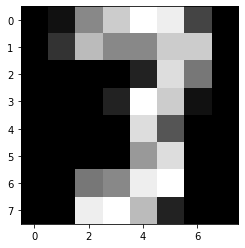

In [43]:
def pintar_numero(d):
    pixels = d.reshape((8, 8))
    plt.imshow(pixels, cmap='gray')
    plt.show()

pintar_numero(digits[23])

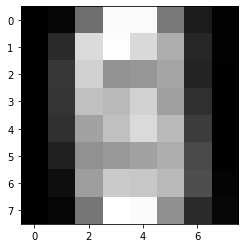

In [44]:
digits_mean = digits.mean(0)

pintar_numero(digits_mean)

## 4.1 Usando diagonalización

Consideremos un conjunto de datos $x_1, x_2, \ldots, x_N$, de media $\bar{x}$. La matrix
$$
    S = \frac{1}{N}\sum_{i=1}^N (x_i - \bar{x})(x_i - \bar{x})^t
$$
se llama *matriz de covarianzas* de los datos. Su entrada $(i,j)$ mide 'como varían' los atributos $i$-ésimo y $j$-ésimo respecto de su media.

Los autovectores de $S$ pueden interpretarse como las 'direcciones de variación principal' y, cuanto mayor sea el autovalor asociado, mayor es la variación.

In [45]:
digits_cent = [d - digits_mean for d in digits]
cov = sum([d.reshape(64,1)*d.reshape(64,1).T for d in digits_cent]).reshape(64,64)

eigenvalues, eigenvectors = la.eig(cov)

In [46]:
eigenvectors[:,0] # Devuelve los autovectores por columnas

array([ 0.00000000e+00,  1.73094651e-02,  2.23428835e-01,  1.35913304e-01,
        3.30323092e-02,  9.66340844e-02,  8.32943805e-03, -2.26900082e-03,
        3.20516495e-04,  1.19308905e-01,  2.44451676e-01, -1.48512745e-01,
        4.67319410e-02,  2.17740744e-01,  1.48136776e-02, -4.47779518e-03,
        4.94136398e-05,  7.95419375e-02, -8.33951454e-02, -2.15915342e-01,
        1.72126801e-01,  1.63712098e-01, -2.86444452e-02, -4.23251803e-03,
       -9.85488574e-05, -6.42319144e-02, -2.54093316e-01,  3.56771026e-02,
        2.09462569e-01,  4.31311420e-02, -5.13118688e-02, -2.13422732e-04,
        0.00000000e+00, -1.59950883e-01, -3.68690774e-01, -1.64406827e-01,
       -8.52007908e-02, -3.72982855e-02, -2.15866980e-02,  0.00000000e+00,
       -1.28865585e-03, -1.06945287e-01, -3.03067457e-01, -2.47813041e-01,
       -2.09637296e-01, -1.22325219e-02,  3.69458497e-02, -1.61485028e-03,
       -6.93023548e-04,  8.35144239e-03,  5.58598986e-02, -9.30534169e-02,
       -1.07387720e-01,  

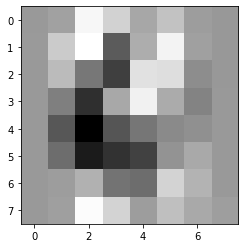

In [47]:
pintar_numero(eigenvectors[:,0])

## 4.2 Usando SVD

Otra forma de realizar el mismo cálculo de forma más efectiva es la siguiente. Sea $X = \left(x_1 - \bar{x}\,|\, x_2- \bar{x}\,|\,\ldots\,|\, x_N- \bar{x}\right)$ la matriz de datos centrados en la media. Obsérvese que, en ese caso, $S = XX^t$.

Apliquemos una descomposición SVD a $X$, de forma que

$$
    X = U\Sigma V^t
$$
con $\Sigma = \mathrm{diag}(\sigma_1, \ldots, \sigma_N)$ con $\sigma_1 \geq \sigma_2 \geq \ldots \geq \sigma_N$ los valores principales ordenados. Entonces, tenemos que

$$
    S = XX^t = U\Sigma V^t V \Sigma^t U^t = U\Sigma\Sigma^t U^t = UD U^t,
$$

dónde $D = \mathrm{diag}(\sigma_1^2, \ldots, \sigma_N^2)$. De este modo, los autovalores de $S$ son $\sigma_1^2, \ldots, \sigma_N^2$ y los autovectores vienen dados por $U$.

In [61]:
# Formamos la matriz X

X = np.matrix(digits_cent).T

U, sigma, V = la.svd(X) # Calculamos la SVD de X

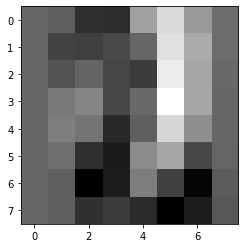

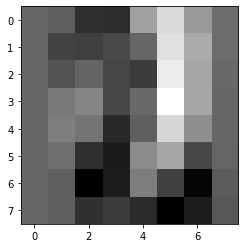

In [62]:
pintar_numero(np.array(U[:,2]))
pintar_numero(eigenvectors[:,2])